# Préparation des features pour la modélisation

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.axes import Axes
import seaborn as sns
import numpy as np
from scipy import stats
from typing import List

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Constantes
TARGET_CO2 = 'GHGEmissionsIntensity'
TARGET_ENERGY = 'SiteEUI(kBtu/sf)'
CIBLES = [TARGET_ENERGY, TARGET_CO2]

# Chargement des données
df_origin = pd.read_csv('data/data_clean.csv')

df = df_origin.copy()

print(f"📊 Dataset chargé")
print(f"   Shape : {df.shape}")
print(f"   Lignes : {len(df):,} bâtiments")
print(f"   Colonnes : {df.shape[1]}")


📊 Dataset chargé
   Shape : (1502, 23)
   Lignes : 1,502 bâtiments
   Colonnes : 23


## 8. Composition finale de X et y

In [21]:
# Séparer X et y
X = df.drop(columns=CIBLES)
y = df[CIBLES]

print(f"X : {X.shape}")
print(f"y : {y.shape}")

X : (1502, 21)
y : (1502, 2)


## 9. Encodage des variables catégorielles

**Objectif** :

Transformer les variables catégorielles en variables numériques pour que les algorithmes de Machine Learning puissent les utiliser.


In [22]:
# Identifier les features catégorielles et numériques
X_categorical = X.select_dtypes(include=['object']).columns.tolist()
X_numeric = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nDimensions de X AVANT encodage : {X.shape}")
print(f"  • Features numériques : {len(X_numeric)}")
print(f"  • Features catégorielles : {len(X_categorical)}")

print(X_categorical)


Dimensions de X AVANT encodage : (1502, 21)
  • Features numériques : 15
  • Features catégorielles : 6
['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']


In [23]:
def display_columns_info(df: pd.DataFrame, columns: List[str]):
    for col in columns:
        n_unique = df[col].nunique()
        n_missing = df[col].isna().sum()
        pct_unique = (n_unique / len(df)) * 100
        pct_missing = (n_missing / len(df)) * 100
        
        print(f"• {col}:")
        print(f"  - Type : {df[col].dtype}")
        print(f"  - Valeurs uniques: {n_unique} ({pct_unique:.1f}%)")
        print(f"  - Valeurs manquantes: {n_missing} ({pct_missing:.1f}%)")
        
        # Afficher les valeurs si peu nombreuses
        if n_unique <= 10:
            print(f"  - Valeurs: {df[col].unique()}")
        print("")
 
display_columns_info(df, X_categorical)

• BuildingType:
  - Type : object
  - Valeurs uniques: 4 (0.3%)
  - Valeurs manquantes: 0 (0.0%)
  - Valeurs: ['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus']

• PrimaryPropertyType:
  - Type : object
  - Valeurs uniques: 21 (1.4%)
  - Valeurs manquantes: 0 (0.0%)

• Neighborhood:
  - Type : object
  - Valeurs uniques: 13 (0.9%)
  - Valeurs manquantes: 0 (0.0%)

• LargestPropertyUseType:
  - Type : object
  - Valeurs uniques: 54 (3.6%)
  - Valeurs manquantes: 0 (0.0%)

• SecondLargestPropertyUseType:
  - Type : object
  - Valeurs uniques: 39 (2.6%)
  - Valeurs manquantes: 0 (0.0%)

• ThirdLargestPropertyUseType:
  - Type : object
  - Valeurs uniques: 40 (2.7%)
  - Valeurs manquantes: 0 (0.0%)



### Stratégie d'encodage pour votre dataset

| Feature | Modalités | Type | Encodage recommandé | Raison |
|---------|-----------|------|---------------------|--------|
| `BuildingType` | 5 | Nominale | **OneHotEncoder** | Peu de modalités, pas d'ordre naturel |
| `Neighborhood` | 13 | Nominale | **OneHotEncoder** | Cardinalité raisonnable |
| `PrimaryPropertyType` | 22 | Nominale | **OneHotEncoder** | Limite acceptable mais surveiller |

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Features ordinal à encoder
# age_mapping = {'old': 0, 'intermediate': 1, 'recent': 2}
# X['building_age_bucket'] = X['building_age_bucket'].map(age_mapping)

# # Features nominales à encoder
# nominal_features = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

# # Créer et appliquer l'encoder
# encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
# X_encoded = encoder.fit_transform(X[nominal_features])

# # Récupérer les noms et créer un DataFrame
# feature_names = encoder.get_feature_names_out(nominal_features)
# X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names, index=X.index)

# # Remplacer les colonnes originales
# X = X.drop(columns=nominal_features)
# X = pd.concat([X, X_encoded_df], axis=1)

In [25]:
print(f"Shape de X : {X.shape}")
print(f"Features numériques : {len(X.select_dtypes(include=[np.number]).columns)}")

Shape de X : (1502, 21)
Features numériques : 15


In [27]:
print(X.dtypes.value_counts())

int64      11
object      6
float64     4
Name: count, dtype: int64


In [26]:
print(f"Valeurs manquantes : {X.isna().sum().sum()}")

Valeurs manquantes : 0


In [28]:
print("\n" + "="*80)
print("💾 SAUVEGARDE DU DATASET")
print("="*80)

# Sauvegarder le dataset
output_path = 'data/data_modelisation.csv'
df_final = pd.concat([X, y], axis=1)
df_final.to_csv(output_path, index=False)

print(f"\n✅ Dataset sauvegardé : {output_path}")
print(f"   Shape : {df_final.shape}")
print(f"   Taille : {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


💾 SAUVEGARDE DU DATASET

✅ Dataset sauvegardé : data/data_modelisation.csv
   Shape : (1502, 23)
   Taille : 0.82 MB


# Comparaison de différents modèles supervisés

In [29]:
from sklearn.pipeline import Pipeline

#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

### Préparation du pipeline de preprocessing

In [30]:
# Séparer les features numériques et catégorielles
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Features numériques ({len(numerical_features)}) : {numerical_features}")
print(f"Features catégorielles ({len(categorical_features)}) : {categorical_features}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), 
         categorical_features)
    ])

print("Preprocessor créé avec succès")

Features numériques (15) : ['NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'is_energy_star_certified', 'num_property_uses', 'has_steam', 'has_electricity', 'has_natural_gas', 'building_age', 'decade_built', 'parking_ratio', 'largest_property_use_type_ratio', 'second_property_use_type_ratio', 'third_property_use_type_ratio']
Features catégorielles (6) : ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']
Preprocessor créé avec succès


## Séparation des données
**Objectif** : Créer un jeu d'entraînement (train) et un jeu de test

In [31]:
y = df[TARGET_ENERGY]

# Séparation train/test (80/20 classique)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42
)

# Affichage des dimensions
print("\n" + "="*50)
print("🔀 SÉPARATION TRAIN / TEST")
print("="*50)
print(f"X_train : {X_train.shape} ({X_train.shape[0]} lignes)")
print(f"y_train : {y_train.shape}")
print("\n")
print(f"X_test  : {X_test.shape} ({X_test.shape[0]} lignes)")
print(f"y_test  : {y_test.shape}")

# Vérifier la répartition
print(f"\nProportion train : {len(X_train) / len(X) * 100:.1f}%")
print(f"Proportion test  : {len(X_test) / len(X) * 100:.1f}%")


🔀 SÉPARATION TRAIN / TEST
X_train : (1201, 21) (1201 lignes)
y_train : (1201,)


X_test  : (301, 21) (301 lignes)
y_test  : (301,)

Proportion train : 80.0%
Proportion test  : 20.0%


## Modèles de régression – scikit-learn

### DummyRegressor
- Modèle de référence (baseline)
- Ne prend pas en compte les variables explicatives
- Prédit une valeur simple (moyenne, médiane, constante, aléatoire)
- Sert à comparer les performances des autres modèles

### LinearRegression
- Modèle de régression linéaire
- Suppose une relation linéaire entre les variables et la cible
- Simple, rapide et interprétable
- Limité pour des relations complexes ou non linéaires

### SVR (Support Vector Regressor)
- Basé sur les machines à vecteurs de support
- Tolère une erreur ε autour de la prédiction
- Permet des relations non linéaires via les kernels
- Sensible aux hyperparamètres et coûteux en calcul

### RandomForestRegressor
- Ensemble d’arbres de décision
- Capture des relations non linéaires complexes
- Robuste au bruit et aux valeurs aberrantes
- Moins interprétable et plus gourmand en ressources

### Résumé
- DummyRegressor : modèle de référence
- LinearRegression : simple et explicable
- SVR : puissant sur données non linéaires
- RandomForestRegressor : performant sur problèmes complexes


In [32]:
def evaluate_model_cv(model, X, y, model_name, cv=5):
    """
    Évalue un modèle avec validation croisée.
    
    Parameters:
    -----------
    model : Pipeline sklearn
        Le modèle à évaluer
    X, y : données d'entraînement
    model_name : str
        Nom du modèle pour l'affichage
    cv : int
        Nombre de folds pour la cross-validation
    
    Returns:
    --------
    dict : résultats de la cross-validation
    """
    scoring = {
        "r2": "r2",
        "mae": "neg_mean_absolute_error",
        "rmse": "neg_root_mean_squared_error"
    }

    cv_results = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )

    results = {
        "model_name": model_name,
        'r2_train_mean': cv_results['train_r2'].mean(),
        'r2_train_std': cv_results['train_r2'].std(),
        'r2_test_mean': cv_results['test_r2'].mean(),
        'r2_test_std': cv_results['test_r2'].std(),
        'mae_test_mean': -cv_results['test_mae'].mean(),
        'mae_test_std': cv_results['test_mae'].std(),
        'rmse_test_mean': -cv_results['test_rmse'].mean(),
        'rmse_test_std': cv_results['test_rmse'].std(),
    }

    # Calculer l'écart train/test pour détecter l'overfit
    results['ecart_r2'] = results['r2_train_mean'] - results['r2_test_mean']
    
    return results

Pipeline TODO

In [33]:
pipelines = {
    "Dummy": Pipeline([
        ("preprocessor", preprocessor),
        ("model", DummyRegressor(strategy="mean"))
    ]),
    "LinearRegression": Pipeline([
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]),

    "SVR": Pipeline([
        ("preprocessor", preprocessor),
        ("model", SVR())
    ]),

    "RandomForest": Pipeline([
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state=42))
    ])
}

all_results = []

for name, pipe in pipelines.items():
    print(f"\nModèle en cours : {name}")
    baseline_results = evaluate_model_cv(
        pipe, X_train, y_train, name, cv=5
    )
    all_results.append(baseline_results)



Modèle en cours : Dummy


/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transfo


Modèle en cours : LinearRegression


/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform.


Modèle en cours : SVR


/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)



Modèle en cours : RandomForest


/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)
/home/rapha/ai-engineer/projet-3/.venv/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [3, 4, 5] during transform.

### Métriques de performance en régression

Pour évaluer la performance d’un modèle de régression, on utilise plusieurs métriques complémentaires.

#### R² (Coefficient de détermination)
- Mesure la proportion de la variance de la variable cible expliquée par le modèle.
- Valeurs possibles :
  - 1 : prédiction parfaite
  - 0 : modèle équivalent à une prédiction par la moyenne
  - < 0 : modèle moins performant que la moyenne
- N’a pas d’unité.
Indique la capacité globale du modèle à expliquer les données.


#### MAE (Mean Absolute Error)
- Moyenne des erreurs absolues entre les valeurs réelles et prédites.
- Même unité que la variable cible.
- Peu sensible aux valeurs aberrantes.
Représente l’erreur moyenne commise par le modèle.


#### RMSE (Root Mean Squared Error)
- Racine de la moyenne des erreurs au carré.
- Même unité que la variable cible.
- Pénalise davantage les grandes erreurs.
Met en évidence les prédictions fortement éloignées de la réalité.

#### Résumé
- **R²** : qualité globale de l’explication
- **MAE** : erreur moyenne simple et interprétable
- **RMSE** : sensibilité aux grandes erreurs


In [34]:
# ============================================
# CRÉATION DU TABLEAU COMPARATIF
# ============================================
results_df = pd.DataFrame(all_results)


# Tri par performance test (R² décroissant)
results_df = results_df.sort_values(
    by="r2_test_mean",
    ascending=False
).reset_index(drop=True)

print("\n" + "="*90)
print("📊 TABLEAU COMPARATIF DES MODÈLES (VALIDATION CROISÉE)")
print("="*90)
display(results_df)
print("="*90)

# # Identifier le meilleur modèle
# best_model = results_df.iloc[0]

# print(f"\nMEILLEUR MODÈLE : {best_model['model_name']}")
# print(f"R² Train moyen : {best_model['r2_train_mean']:.4f}")
# print(f"R² Test moyen  : {best_model['r2_test_mean']:.4f}")
# print(f"Écart R²      : {best_model['r2_test_std']:.4f}")
# print(f"MAE Test moyen      : {best_model['mae_test_mean']:.2e}")
# print(f"RMSE Test moyen    : {best_model['rmse_test_mean']:.2e}")


📊 TABLEAU COMPARATIF DES MODÈLES (VALIDATION CROISÉE)


,model_name,r2_train_mean,r2_train_std,r2_test_mean,r2_test_std,mae_test_mean,mae_test_std,rmse_test_mean,rmse_test_std,ecart_r2
0,RandomForest,0.908760,0.004112,0.340930,0.072780,28.183231,1.525910,41.523760,2.220208,0.567831
1,LinearRegression,0.541043,0.017330,0.263682,0.088458,30.707876,0.564733,43.815206,1.083261,0.277361
2,SVR,0.013510,0.007967,-0.000941,0.026540,32.370096,2.329103,51.429424,4.390557,0.014451
3,Dummy,0.000000,0.000000,-0.004168,0.002874,36.424454,1.931799,51.482527,3.893658,0.004168


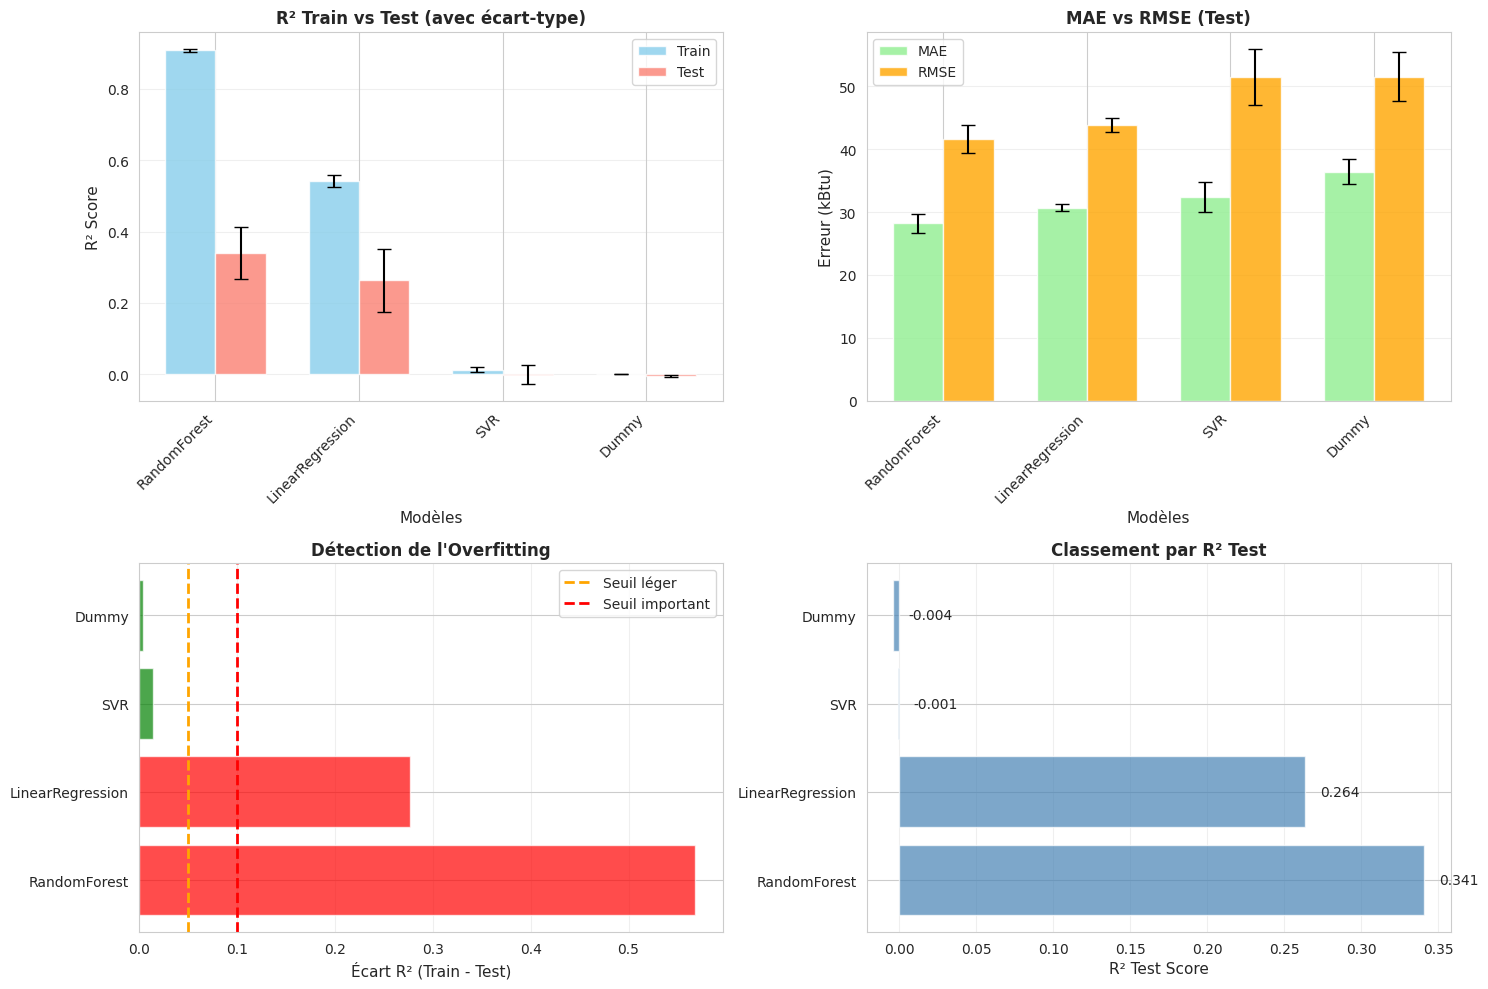

In [35]:
# ============================================
# VISUALISATIONS
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. R² Train vs Test avec barres d'erreur
ax1 = axes[0, 0]
x_pos = np.arange(len(results_df))
width = 0.35

ax1.bar(x_pos - width/2, results_df['r2_train_mean'], width, 
        yerr=results_df['r2_train_std'], label='Train', 
        alpha=0.8, color='skyblue', capsize=5)
ax1.bar(x_pos + width/2, results_df['r2_test_mean'], width, 
        yerr=results_df['r2_test_std'], label='Test', 
        alpha=0.8, color='salmon', capsize=5)

ax1.set_xlabel('Modèles', fontsize=11)
ax1.set_ylabel('R² Score', fontsize=11)
ax1.set_title('R² Train vs Test (avec écart-type)', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(results_df['model_name'], rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. MAE et RMSE avec barres d'erreur
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, results_df['mae_test_mean'], width, 
        yerr=results_df['mae_test_std'], label='MAE', 
        alpha=0.8, color='lightgreen', capsize=5)
ax2.bar(x_pos + width/2, results_df['rmse_test_mean'], width, 
        yerr=results_df['rmse_test_std'], label='RMSE', 
        alpha=0.8, color='orange', capsize=5)

ax2.set_xlabel('Modèles', fontsize=11)
ax2.set_ylabel('Erreur (kBtu)', fontsize=11)
ax2.set_title('MAE vs RMSE (Test)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['model_name'], rotation=45, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Écart R² (overfit)
ax3 = axes[1, 0]
colors = ['green' if x < 0.05 else 'orange' if x < 0.10 else 'red' 
          for x in results_df['ecart_r2']]
ax3.barh(results_df['model_name'], results_df['ecart_r2'], color=colors, alpha=0.7)
ax3.axvline(x=0.05, color='orange', linestyle='--', linewidth=2, label='Seuil léger')
ax3.axvline(x=0.10, color='red', linestyle='--', linewidth=2, label='Seuil important')
ax3.set_xlabel('Écart R² (Train - Test)', fontsize=11)
ax3.set_title('Détection de l\'Overfitting', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(axis='x', alpha=0.3)

# 4. Comparaison globale R² Test
ax4 = axes[1, 1]
ax4.barh(results_df['model_name'], results_df['r2_test_mean'], 
         color='steelblue', alpha=0.7)
ax4.set_xlabel('R² Test Score', fontsize=11)
ax4.set_title('Classement par R² Test', fontsize=12, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (idx, row) in enumerate(results_df.iterrows()):
    ax4.text(row['r2_test_mean'] + 0.01, i, f"{row['r2_test_mean']:.3f}", 
             va='center', fontsize=10)

plt.tight_layout()
plt.show()